# problem statement
#Develop a machine learning model to predict the popularity of a music track based on its audio and metadata features.

In [80]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [81]:
# Read a CSV file and store it in a DataFrame named 'df'
df=pd.read_csv(r"C:\Users\Debashish\Desktop\Compition with me\data.csv")

In [82]:
df


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.69400,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.47700,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.33800,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.80700,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.07260,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1298745,Akkarai Subhalakshmi,Sravanam - Madhyamavathi - Adi (Live),1tpOChGX8v34yHVukGk8DG,0,2009,indian,0.419,0.748,2,-10.657,1,0.1940,0.67400,0.000022,0.0800,0.827,171.229,873027,4
1048571,1298746,Fossils,Guru,2NU6Ne7jNlunEkmat52m8W,13,2009,indian,0.576,0.787,2,-6.503,1,0.0459,0.00313,0.000621,0.3780,0.593,112.010,348475,4
1048572,1298747,Lalgudi Vijayalakshmi,Nidhichala,4w11WNonK6ZRGyWVWLWM8n,0,2009,indian,0.534,0.314,4,-13.593,1,0.0533,0.95100,0.762000,0.2890,0.490,138.522,1582187,4
1048573,1298748,Lalgudi Vijayalakshmi,Govardhana,1ypYdGD0dz8bRLUF9kdG1L,0,2009,indian,0.494,0.319,4,-14.487,0,0.0536,0.95800,0.784000,0.1010,0.398,150.335,801213,3


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1048575 non-null  int64  
 1   artist_name       1048575 non-null  object 
 2   track_name        1048575 non-null  object 
 3   track_id          1048575 non-null  object 
 4   popularity        1048575 non-null  int64  
 5   year              1048575 non-null  int64  
 6   genre             1048575 non-null  object 
 7   danceability      1048575 non-null  float64
 8   energy            1048575 non-null  float64
 9   key               1048575 non-null  int64  
 10  loudness          1048575 non-null  float64
 11  mode              1048575 non-null  int64  
 12  speechiness       1048575 non-null  float64
 13  acousticness      1048575 non-null  float64
 14  instrumentalness  1048575 non-null  float64
 15  liveness          1048575 non-null  float64
 16  

In [84]:
len(df['artist_name'].unique())

61825

In [85]:
df.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.820514e+05,1.874687e+01,2.012135e+03,5.377796e-01,6.387387e-01,5.286472e+00,-9.001836e+00,6.337620e-01,9.306985e-02,3.216099e-01,2.518109e-01,2.224674e-01,4.542687e-01,1.213105e+02,2.479807e+05,3.886117e+00
std,3.755241e+05,1.607041e+01,7.128070e+00,1.845742e-01,2.707980e-01,3.556115e+00,5.710919e+00,4.817758e-01,1.269212e-01,3.547914e-01,3.649522e-01,2.004279e-01,2.682246e-01,2.978620e+01,1.446411e+05,4.672870e-01
min,0.000000e+00,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.609800e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,2.621435e+05,5.000000e+00,2.006000e+03,4.130000e-01,4.520000e-01,2.000000e+00,-1.084400e+01,0.000000e+00,3.720000e-02,6.570000e-03,1.050000e-06,9.790000e-02,2.250000e-01,9.863750e+01,1.803915e+05,4.000000e+00
50%,5.242870e+05,1.600000e+01,2.013000e+03,5.510000e-01,6.920000e-01,5.000000e+00,-7.463000e+00,1.000000e+00,5.070000e-02,1.480000e-01,1.730000e-03,1.340000e-01,4.360000e-01,1.216590e+02,2.248270e+05,4.000000e+00
75%,9.088995e+05,2.900000e+01,2.018000e+03,6.780000e-01,8.720000e-01,8.000000e+00,-5.285000e+00,1.000000e+00,8.930000e-02,6.390000e-01,6.110000e-01,2.910000e-01,6.720000e-01,1.398900e+02,2.851730e+05,4.000000e+00
max,1.298749e+06,1.000000e+02,2.023000e+03,9.920000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.498980e+02,6.000495e+06,5.000000e+00


# correlation


In [86]:
df1=df.corr()  # it mean that it is help to remove char type or object type Dtype
df1


,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Unnamed: 0,1.000000,-0.200569,-0.565147,-0.016199,-0.015774,0.003863,-0.035763,0.021912,-0.016150,0.017915,-0.003041,0.007039,0.073975,-0.009537,0.042809,-0.003798
popularity,-0.200569,1.000000,0.354250,0.107004,0.008397,0.001202,0.105279,-0.024882,-0.024835,-0.059813,-0.151623,-0.059970,-0.019905,0.002810,-0.120742,0.031377
year,-0.565147,0.354250,1.000000,0.041683,0.020946,-0.003639,0.044089,-0.032451,0.029270,-0.026196,0.014618,-0.015799,-0.105086,0.020266,-0.095261,0.008608
danceability,-0.016199,0.107004,0.041683,1.000000,0.138634,0.030599,0.259798,-0.051449,0.088903,-0.175036,-0.176651,-0.119051,0.520414,-0.016777,-0.027390,0.183225
energy,-0.015774,0.008397,0.020946,0.138634,1.000000,0.038788,0.781215,-0.052398,0.112159,-0.754311,-0.185625,0.189249,0.247320,0.265117,0.014288,0.170766
key,0.003863,0.001202,-0.003639,0.030599,0.038788,1.000000,0.027150,-0.168272,0.011880,-0.034705,-0.000478,-0.005602,0.026460,0.009311,0.008960,0.010702
loudness,-0.035763,0.105279,0.044089,0.259798,0.781215,0.027150,1.000000,-0.020274,0.022641,-0.623736,-0.406068,0.091150,0.294168,0.233847,-0.043523,0.172041
mode,0.021912,-0.024882,-0.032451,-0.051449,-0.052398,-0.168272,-0.020274,1.000000,-0.019934,0.067653,-0.056960,0.023968,0.018471,-0.005030,-0.038742,-0.017111
speechiness,-0.016150,-0.024835,0.029270,0.088903,0.112159,0.011880,0.022641,-0.019934,1.000000,0.029292,-0.143968,0.280778,0.040171,-0.030583,-0.064272,-0.028337
acousticness,0.017915,-0.059813,-0.026196,-0.175036,-0.754311,-0.034705,-0.623736,0.067653,0.029292,1.000000,0.099801,-0.033604,-0.104466,-0.239510,-0.065569,-0.169147


In [87]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Unnamed: 0 to time_signature
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        16 non-null     float64
 1   popularity        16 non-null     float64
 2   year              16 non-null     float64
 3   danceability      16 non-null     float64
 4   energy            16 non-null     float64
 5   key               16 non-null     float64
 6   loudness          16 non-null     float64
 7   mode              16 non-null     float64
 8   speechiness       16 non-null     float64
 9   acousticness      16 non-null     float64
 10  instrumentalness  16 non-null     float64
 11  liveness          16 non-null     float64
 12  valence           16 non-null     float64
 13  tempo             16 non-null     float64
 14  duration_ms       16 non-null     float64
 15  time_signature    16 non-null     float64
dtypes: float64(16)
memory usage: 2

<AxesSubplot:>

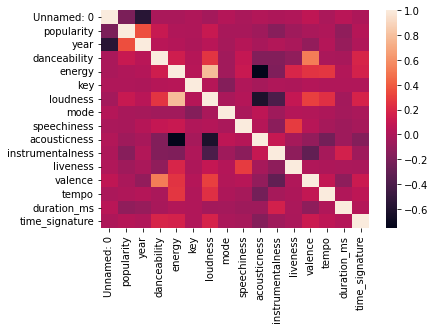

In [88]:
sns.heatmap(df1)


In [89]:

df1["popularity"].sort_values(ascending=False)

popularity          1.000000
year                0.354250
danceability        0.107004
loudness            0.105279
time_signature      0.031377
energy              0.008397
tempo               0.002810
key                 0.001202
valence            -0.019905
speechiness        -0.024835
mode               -0.024882
acousticness       -0.059813
liveness           -0.059970
duration_ms        -0.120742
instrumentalness   -0.151623
Unnamed: 0         -0.200569
Name: popularity, dtype: float64

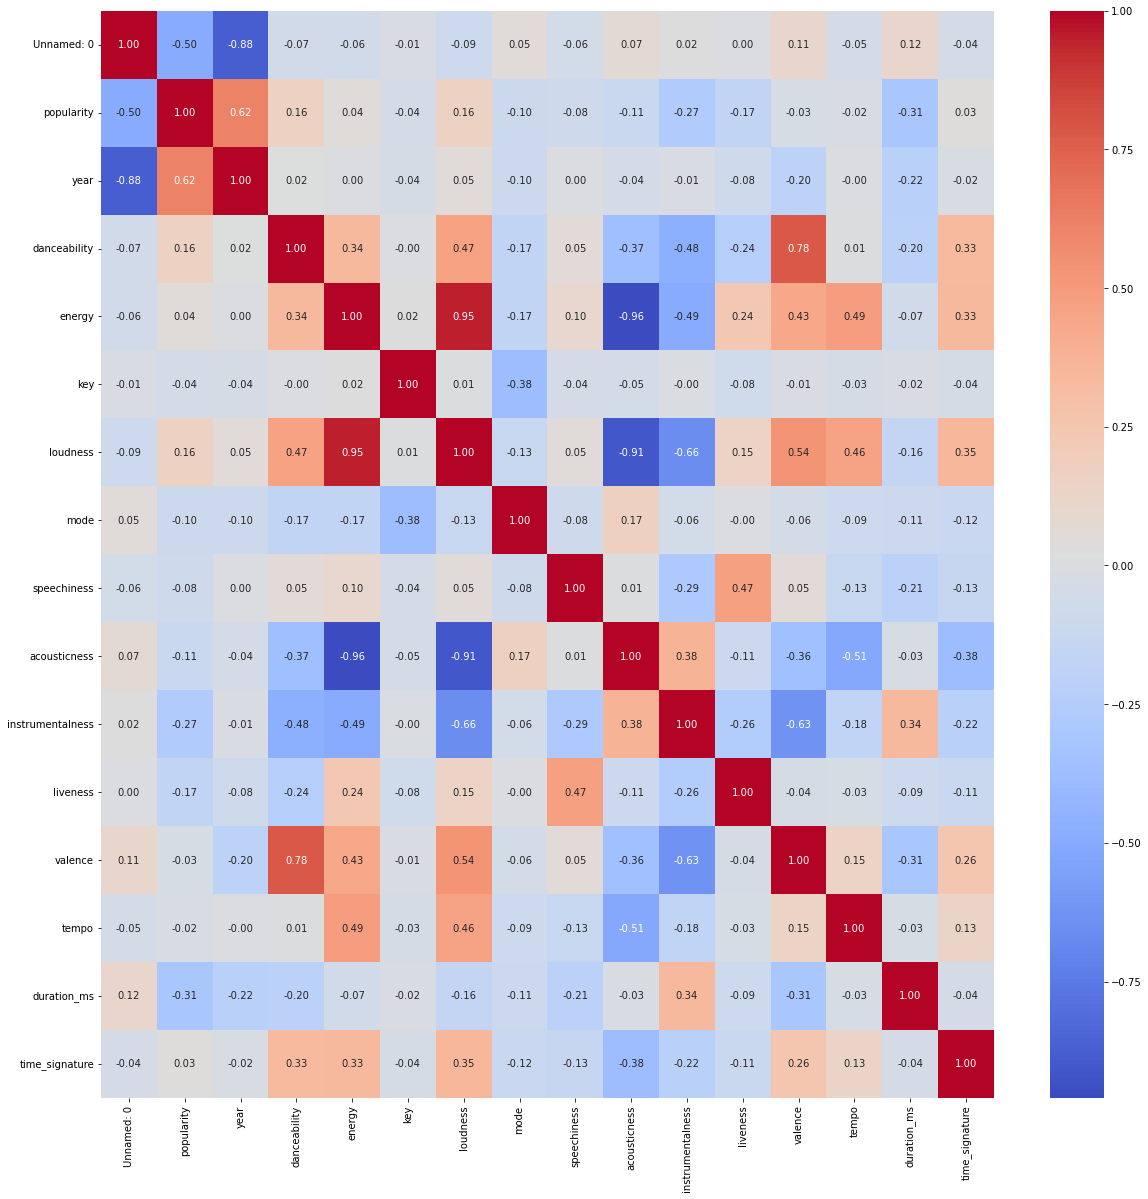

In [90]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data=df1.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [91]:
# independent and dependent variable
X = df1[['danceability', 'energy', 'loudness', 'tempo']]
y = df1['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Create a linear regression model
df1 = LinearRegression()



In [93]:
# Fit the model on the training data
df1.fit(X_train, y_train)


LinearRegression()

In [94]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [95]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.23774434199003835
R-squared (R2) Score: -0.01249123934451779


In [96]:
# Now, you can use the model to make predictions for new music tracks
new_track_features = [[0.75, 0.85, -6.0, 120.0]]  # Example feature values for a new track
predicted_popularity = model.predict(new_track_features)
print("Predicted Popularity:", predicted_popularity[0])

Predicted Popularity: -3.7854286331646994


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
